In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

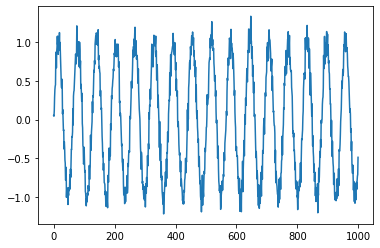

In [ ]:
# make the originala data
N = 1000
series = np.sin(0.1*np.arange(N))  + np.random.randn(N)*0.1

# plot it
plt.plot(series)
plt.show()

In [ ]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y).reshape(-1,1)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

In [ ]:
### try autoregressive linear model
model = nn.Linear(T,1)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [ ]:
# make inputs and targets
# we dont want to split out data randomly in this case because we want to predict
# the future
X_train = torch.from_numpy(X[:N//2].astype(np.float32()))
y_train = torch.from_numpy(Y[:N//2].astype(np.float32()))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32()))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32()))

In [ ]:
# Training
## full gradiant descent != batch gradient descent
## we use the full dataset because in this case, its small
def full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs=200):
  # Stuff to store
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()

    # Test loss 
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if (it + 1) % 5 == 0:
      print(f'Epoch  {it+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

  return train_losses, test_losses




In [ ]:
train_losses, test_losses = full_gd(model,criterion, optimizer,X_train, y_train, X_test, y_test)

Epoch  5/200, Train Loss: 0.5668, Test Loss: 0.4075
Epoch  10/200, Train Loss: 0.1782, Test Loss: 0.2238
Epoch  15/200, Train Loss: 0.0234, Test Loss: 0.0446
Epoch  20/200, Train Loss: 0.0715, Test Loss: 0.0406
Epoch  25/200, Train Loss: 0.0734, Test Loss: 0.0707
Epoch  30/200, Train Loss: 0.0320, Test Loss: 0.0432
Epoch  35/200, Train Loss: 0.0213, Test Loss: 0.0222
Epoch  40/200, Train Loss: 0.0235, Test Loss: 0.0206
Epoch  45/200, Train Loss: 0.0240, Test Loss: 0.0237
Epoch  50/200, Train Loss: 0.0205, Test Loss: 0.0231
Epoch  55/200, Train Loss: 0.0176, Test Loss: 0.0202
Epoch  60/200, Train Loss: 0.0166, Test Loss: 0.0188
Epoch  65/200, Train Loss: 0.0165, Test Loss: 0.0183
Epoch  70/200, Train Loss: 0.0166, Test Loss: 0.0182
Epoch  75/200, Train Loss: 0.0164, Test Loss: 0.0181
Epoch  80/200, Train Loss: 0.0162, Test Loss: 0.0179
Epoch  85/200, Train Loss: 0.0160, Test Loss: 0.0178
Epoch  90/200, Train Loss: 0.0159, Test Loss: 0.0178
Epoch  95/200, Train Loss: 0.0158, Test Loss: 0

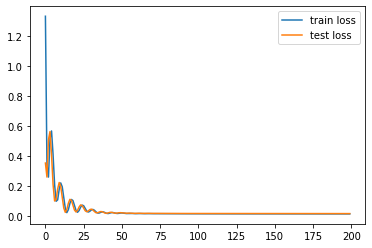

In [ ]:
# Plot the train loss and testloss per iteraiton
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [ ]:
# "Wrong forecast using true targets"

validation_target = Y[-N//2:]
validation_predictions = []

# index of firts validation input
i = 0

while len(validation_predictions) < len(validation_target):
  input_ = X_test[i].view(1,-1)
  p = model(input_)[0,0].item() # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

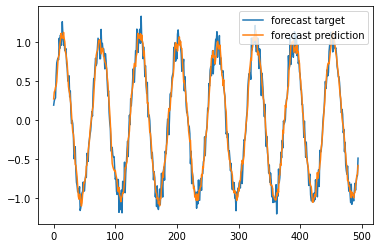

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
# "correct forecast using true targets"

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
# 1-D array of length T
last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
  input_ = last_x.view(1,-1)
  p = model(input_)
  #[0,0].item() # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p[0,0].item())

  # make the new input
  last_x = torch.cat((last_x[1:], p[0]))

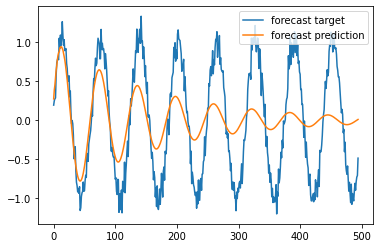

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()